In [1]:
library(tidyverse)
theme_set(theme_classic())
options(repr.plot.width  = 10, repr.plot.height = 6)
set.seed(1)

── Attaching core tidyverse packages ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504
## Week 11: Survival Analysis III & Backblaze data

In [2]:
library(tidyverse)
library(survival)
library(survminer)
library(gtsummary)

Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




## More on Backblaze data

In [3]:
load("/scratch/backblaze/bb_reduced.RData")

In [34]:
bb_reduced %>% ungroup %>% mutate(
    lspan = `max(date, na.rm = T)` - `min(date, na.rm = T)`, 
    f = `max(failure, na.rm = T)`,
    mfr = str_sub(model, 1, 2)
) -> bb_named

In [46]:
bb_named

serial_number,model,"max(date, na.rm = T)","min(date, na.rm = T)",max(log2(capacity_bytes)),"max(failure, na.rm = T)","min(failure, na.rm = T)",smart_5_raw,smart_9_raw,smart_187_raw,smart_188_raw,smart_197_raw,smart_198_raw,lspan,f,mfr
<chr>,<chr>,<date>,<date>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<drtn>,<int>,<chr>
02308a3415be0010,DELLBOSS VD,2021-12-31,2021-06-02,38.80435,0,0,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,212 days,0,DE
043d3be09f4a0010,DELLBOSS VD,2021-12-31,2021-07-22,38.80435,0,0,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,162 days,0,DE
04a81d26aebf0010,DELLBOSS VD,2021-12-31,2021-11-19,38.80435,0,0,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,42 days,0,DE
0564f6f3fab90010,DELLBOSS VD,2021-12-31,2020-04-23,38.80435,0,0,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,617 days,0,DE
07590fcc256e0010,DELLBOSS VD,2021-12-31,2021-06-02,38.80435,0,0,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,212 days,0,DE
078ea1af2c3f0010,DELLBOSS VD,2021-12-31,2020-12-31,38.80435,0,0,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,365 days,0,DE
0994474db98f0010,DELLBOSS VD,2021-12-31,2021-11-06,38.80435,0,0,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,55 days,0,DE
0F112CC45,00MD00,2017-04-18,2017-04-12,41.86342,0,0,0,14476,0,0,0,0,6 days,0,00
0bfedcc6487b0010,DELLBOSS VD,2021-12-31,2021-08-06,38.80435,0,0,-Inf,-Inf,-Inf,-Inf,-Inf,-Inf,147 days,0,DE


In [37]:
count(bb_named, mfr) %>% top_n(5)

Selecting by n


mfr,n
<chr>,<int>
HG,53160
Hi,12727
ST,162671
TO,48859
WD,23059


In [39]:
top_mfrs <- bb_named %>% count(mfr) %>% top_n(5)

Selecting by n


Joining with `by = join_by(mfr)`


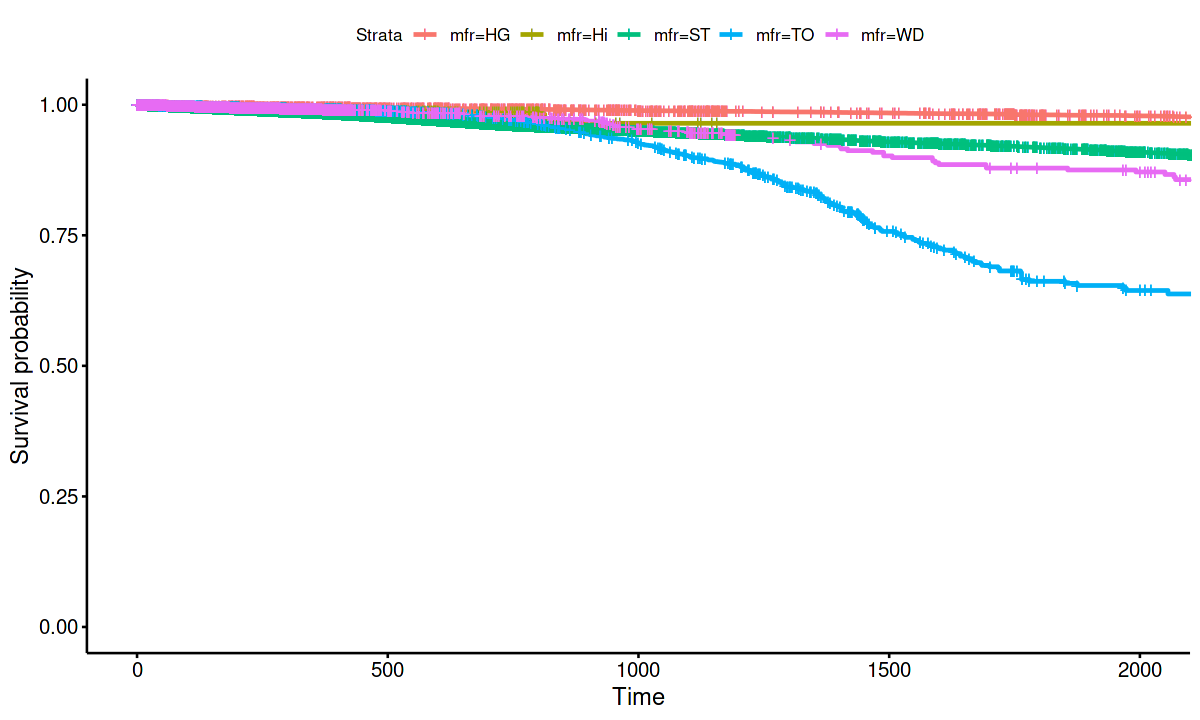

In [41]:
semi_join(bb_named, top_mfrs) -> bb_top
survfit(Surv(lspan, f) ~ mfr, data=bb_top) %>% ggsurvplot

In [49]:
bb_top <- filter(bb_top, smart_197_raw > -Inf)
coxph(Surv(lspan, f) ~ mfr + `max(log2(capacity_bytes))` + smart_197_raw, data=bb_top) %>% summary

Call:
coxph(formula = Surv(lspan, f) ~ mfr + `max(log2(capacity_bytes))` + 
    smart_197_raw, data = bb_top)

  n= 241573, number of events= 9455 
   (55988 observations deleted due to missingness)

                                  coef  exp(coef)   se(coef)       z Pr(>|z|)
mfrHi                        3.037e-01  1.355e+00  9.353e-02   3.247  0.00117
mfrST                        1.578e+00  4.844e+00  4.254e-02  37.084  < 2e-16
mfrTO                        1.519e+00  4.566e+00  5.551e-02  27.358  < 2e-16
mfrWD                        8.731e-01  2.394e+00  7.962e-02  10.965  < 2e-16
`max(log2(capacity_bytes))` -4.083e-01  6.648e-01  8.319e-03 -49.084  < 2e-16
smart_197_raw                1.785e-05  1.000e+00  9.087e-07  19.647  < 2e-16
                               
mfrHi                       ** 
mfrST                       ***
mfrTO                       ***
mfrWD                       ***
`max(log2(capacity_bytes))` ***
smart_197_raw               ***
---
Signif. codes:  0 ‘***’ 0.

## Testing for differences in survival

- How can we test whether there is a significant difference in survival between different groups?
- Idea: $$H_0: h_0(t) = h_1(t)$$ versus $$H_1: h_0(t) = \lambda h_1(t)$$ for some $\lambda\neq 1$.
- Under $H_0$, appropriate test statistic has approximately Normal(0,1) distribution.

In [10]:
(km_diff <- survdiff(Surv(time, status) ~ sex, data = lung))
(km_fit <- survfit(Surv(time, status) ~ sex, data = lung))

Call:
survdiff(formula = Surv(time, status) ~ sex, data = lung)

        N Observed Expected (O-E)^2/E (O-E)^2/V
sex=1 138      112     91.6      4.55      10.3
sex=2  90       53     73.4      5.68      10.3

 Chisq= 10.3  on 1 degrees of freedom, p= 0.001 

Call: survfit(formula = Surv(time, status) ~ sex, data = lung)

        n events median 0.95LCL 0.95UCL
sex=1 138    112    270     212     310
sex=2  90     53    426     348     550

In [12]:
(km_diff <- survdiff(Surv(time, status) ~ ph.ecog, data = lung))

Call:
survdiff(formula = Surv(time, status) ~ ph.ecog, data = lung)

n=227, 1 observation deleted due to missingness.

            N Observed Expected (O-E)^2/E (O-E)^2/V
ph.ecog=0  63       37   54.153    5.4331    8.2119
ph.ecog=1 113       82   83.528    0.0279    0.0573
ph.ecog=2  50       44   26.147   12.1893   14.6491
ph.ecog=3   1        1    0.172    3.9733    4.0040

 Chisq= 22  on 3 degrees of freedom, p= 7e-05 

How about comparing the median time to survival?

In [13]:
surv_median(km_fit)

Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
ℹ Please use `select()` instead.
ℹ The deprecated feature was likely used in the survminer package.
  Please report the issue at <https://github.com/kassambara/survminer/issues>.”


strata,median,lower,upper
<chr>,<dbl>,<dbl>,<dbl>
sex=1,270,212,310
sex=2,426,348,550


       chisq df   p
sex      2.7  1 0.1
GLOBAL   2.7  1 0.1

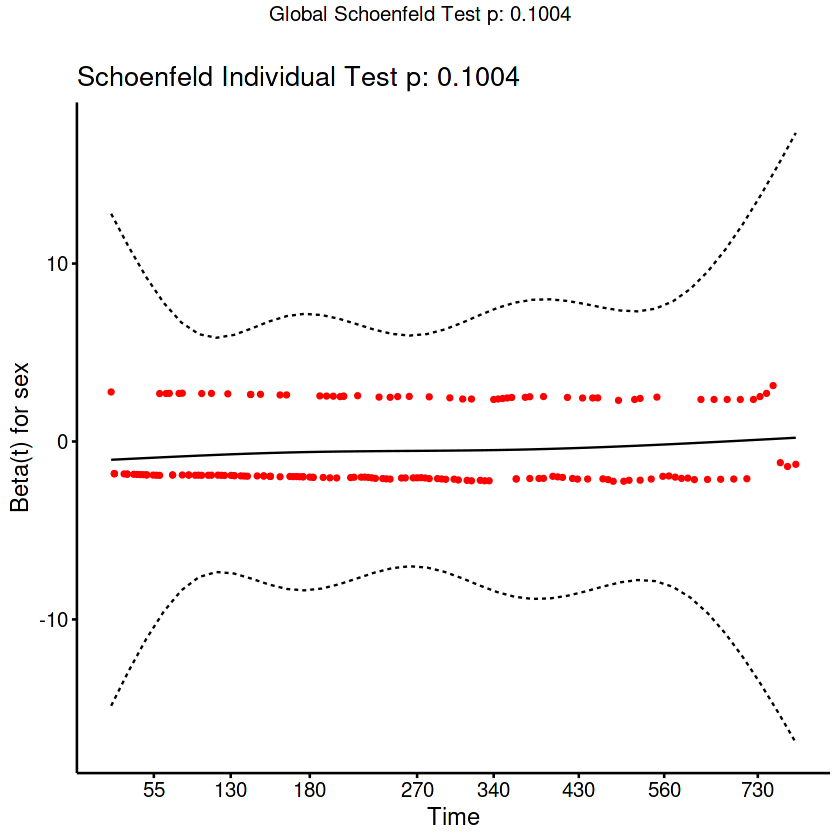

## Machine learning methods in survival analysis

- We have studied three ways of estimating survival:
    - Nonparametric (Kaplan-Meier):
        - Pros: no assumptions about the survival distribution.
        - Cons: cannot accomodate covariates.
    - Semi-parametric (Cox regression):
        - Pros: allows covariates; somewhat interpretable.
        - Cons: proportional hazards assumption may not be realistic.
    - Parametric (Weibull / log-logistic / etc. regression)
        - Pros: very interpretable. straightforward theory.
        - Cons: too simplistic in some cases.

### Random survival forests
- Today we will look at a technique, random survival forests (RSF), that tries to combine the strengths of these three approaches.
- We will estimate the cumulative hazard function $\hat{H}(t)$ (aka CHF) in a way that
    - Places minimal assumptions on the true function $H(t)$, 
    - Can depend on covariates, and is
    - (somewhat) interpretable 

### Bagging
- Bagging stands for "bootstrap aggregation".
- Suppose we have training data $\mathbf{Z}=\{(x_1,y_1),\dots,(x_N,y_N)\}$. Using whatever method, we obtain a prediction function $\hat{y}=\hat{f}(x\mid\mathbf{Z})$.
- Now suppose instead of fitting one training function, we form bootstrap replicates $\mathbf{Z}^*_1,\dots,\mathbf{Z}^*_B$ from the training data and use each to form a prediction function $$\hat{f}(x\mid \mathbf{Z}^*_b),\quad b=1,\dots,B.$$
- The "bagged" prediction function is $$\hat{f}^*(x\mid\mathbf{Z}) = \frac{1}{B}\sum_b \hat{f}(x\mid \mathbf{Z}_b^*)=\frac{1}{B}\sum_b \hat{f}_b(x)$$

### Why bagging works
- Let the true distribution of the the $x_i$ be denoted $\mathcal{P}$.
- The true regression function is $f(x)$, so that $\hat{f}_b(x)=f(x)+\epsilon_b(x)$.
- The average error of the un-bagged predictors is $$E_\text{avg} = \frac{1}{B} \mathbb{E}_x\left\{[\hat{f}_b(x)-f(x)]^2\right\}=\frac{1}{B}\sum_b\mathbb{E}_x[\epsilon_b(x)^2].$$

- If the errors are zero-mean, variance $\sigma^2$ and $\rho=\operatorname{cor}[\epsilon_i(x),\epsilon_j(x)]$ then
he average error of the bagged regression function is $$E_\text{bag}=\mathbb{E}_x \left\{\left[ \frac{1}{B} \sum_b \epsilon_b(x)\right]^2 \right\} = \rho \sigma^2 + \frac{1-\rho}{B}\sigma^2$$
- In particular, if $\rho=0$ then  $E_\text{bag} = E_\text{avg}/ B$.
- Goal is to make $\rho$ small. This is what RF tries to achieve by randomly subsetting the predictors over which splits are computed.

### The random survival forest algorithm
1. Draw $B$ bootstrap samples from the data. For each sample, record also the OOB (out-of-bag) portion of the sample.
2. Grow a survival tree for each bootstrap sample. Keep growing until all terminal nodes have no less than $d_0>0$ unique deaths.
3. Calculate a CHF for each tree. Average to obtain the ensemble CHF.

## Understanding variable importance
- Ensemble methods can be difficult to interpret.
- The authors suggest the following measure of variable importance: 
    - Drop the OOB cases on each tree. Each time the focal predictor $X$ is encountered in a decision rule, pick a random branch.
    - Variable importance is defined as the difference in prediction error between this and the ensemble prediction.

In [14]:
# install.packages("randomForestSRC")

library(randomForestSRC)


 randomForestSRC 3.2.3 
 
 Type rfsrc.news() to see new features, changes, and bug fixes. 
 



Attaching package: ‘randomForestSRC’


The following object is masked from ‘package:purrr’:

    partial




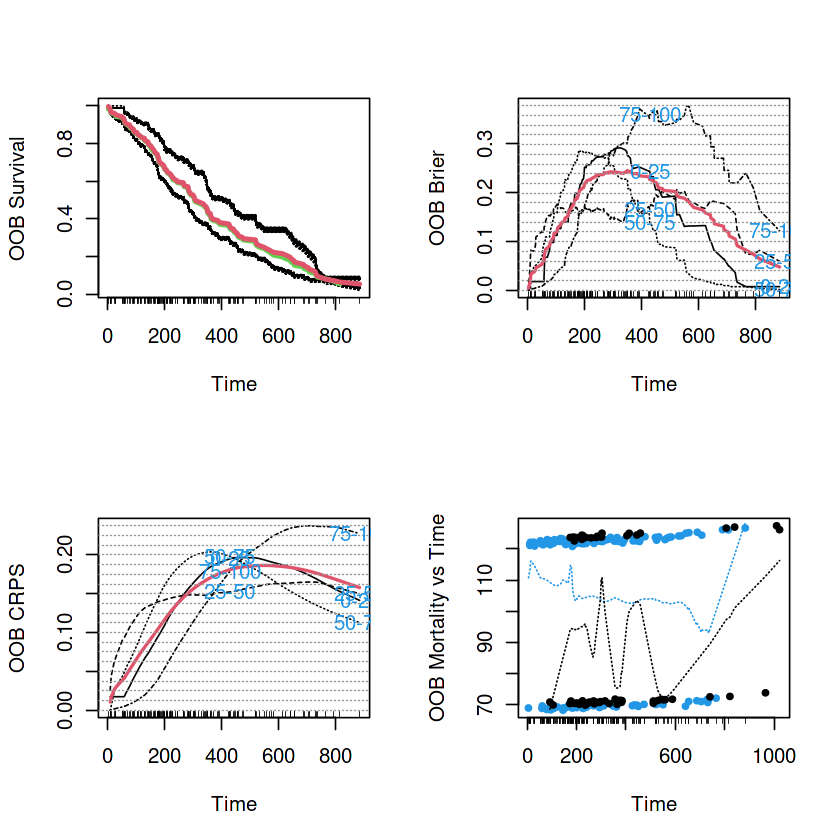

In [19]:
library(randomForestSRC)
lung %>%
    mutate(status = status - 1) %>% 
    rfsrc(Surv(time, status) ~ sex, data = .) %>% 
    plot.survival(show.plots = 1)

In [20]:
rf_fit <- rfsrc(Surv(life, event) ~ inducted, data = hof_surv)

plot.survival(rf_fit)

ERROR: Error in parseFormula(formula, data, ytry): object 'hof_surv' not found
